## Лабораторная работа 1. Знакомство с библиотеками для анализа данных

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython/Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

Мы уверены, что выполнение лабораторных работ занимает значительное время, поэтому не рекомендуем оставлять их на последний вечер перед сдачей.

### О задании

Лабораторная работа №1 направлена на работу с пакетами для анализа данных. В данной работе разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью работы является редактирование данного ipython notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции.

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов.
Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому для исключения подозрения в плагиате, необходима ссылка на источник).

###  Правила сдачи

Работу необходимо сдавать в систему Anytask (более подробную информацию можно найти на странице курса). Название отправляемого файла должно иметь следующий формат: Surname_Name_Group_NN.ipynb, где NN — номер лабораторной работы. Например, Kozlova_Anna_CS_01.ipynb.

### (8 баллов) Знакомство с Numpy

Во всех заданиях данного раздела запрещено использовать циклы (ключевые слова *for* и *while*). Использование функции *map* также не допускается. Для каждой задачи приведите примеры использования реализованных функций. За отсутствие тестовых примеров могут быть сняты баллы за задание.

Под матрицей в заданиях понимается двумерный numpy.array.

In [1]:
import numpy as np

**1. (0.5 балла)** Реализуйте функцию, принимающую на вход матрицу X и два массива i и j одинаковой длины и возвращающую вектор np.array, состоящий из последовательности элементов [X[i[0], j[0]], X[i[1], j[1]], ..., X[i[N-1], j[N-1]]].

In [2]:
def construct_array(X, i, j):
    return X[i,j]

X = np.arange(0,16).reshape(4,4)
print("matrix X:")
print(X)
i = np.array([0,2,2])
j = np.array([0,1,2])
print("result of our function:", construct_array(X, i, j))

matrix X:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
result of our function: [ 0  9 10]


**2. (0.5 балла)** Реализуйте функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы.
Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответом является 3. Если ненулевых элементов нет, функция должна возвращать *None*.

In [3]:
def nonzero_product(X):
    nzShape = np.shape(np.nonzero(np.diagonal(X)))
    if nzShape[1] > 0:
        return nzShape[1]
    else:
        return None
    
X = np.arange(0,16).reshape(4,4)
print("matrix X:")
print(X)
print("result of our function:", nonzero_product(X))
X = np.zeros((4,4))
print("matrix X:")
print(X)
print("result of our function:", nonzero_product(X))

matrix X:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
result of our function: 3
matrix X:
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
result of our function: None


**3. (0.5 балла)** Написать функцию, возвращающую максимальный элемент в массиве *x* среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если подходящих элементов нет, функция должна возвращать *None*.

**Рашэнне:** Ствараем масіў, які выглядае так: shifted = [1,arr], апошні элемент arr не патрэбен. Стровым трэці масіў, які будзе паэлементнай сумай arr і shifted. Пасля паэлементна параўнаем элементы апошняга створанага і arr, тыя, што аднолькавыя, якраз тыя, перад якімі стаяў нуль. Сярод іх шукаем максімум, калі масіў няпусты. 

In [4]:
def max_element(arr):
    shift = np.arange(0, arr.shape[0]-1)
    shifted = np.insert(arr[shift], 0, 1)
    checker = arr + shifted
    properArr = arr[arr == checker]
    if properArr.shape[0] > 0:
        return max(properArr)
    else:
        return None
    return 0

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print("x: ", x)
print("result of our function:", max_element(x))
x = np.ones(10)
print("x: ", x)
print("result of our function:", max_element(x))
x = np.ones(10)
x = np.insert(x, 10, 0)
print("x: ", x)
print("result of our function:", max_element(x))
x = np.insert(x, 10, 0)
print("x: ", x)
print("result of our function:", max_element(x))

x:  [6 2 0 3 0 0 5 7 0]
result of our function: 5
x:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
result of our function: None
x:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
result of our function: None
x:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.]
result of our function: 0.0


**4. (0.5 балла)** Реализуйте функцию, принимающую на вход матрицу *X* и некоторое число *v* и возвращающую ближайший к заданному числу элемент матрицы. Например, для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [5]:
def nearest_value(X, v):
    y = abs(X-v)
    min_el = min(y.ravel())
    index = np.where(y == min_el)
    return X[index][0]

X = np.arange(0,16).reshape(4,4)
print("matrix X:")
print(X)
print("result of our function", "(v = 10.2):", nearest_value(X, 10.2))
print("result of our function", "(v = 3.5):", nearest_value(X, 3.5))

matrix X:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
result of our function (v = 10.2): 10
result of our function (v = 3.5): 3


**5. (0.5 балла)** Реализуйте функцию, принимающую на вход матрицу *X* и возвращающую все её уникальные строки в виде матрицы.

http://stackoverflow.com/questions/16970982/find-unique-rows-in-numpy-array
Запыт: np.unique python праз Яндэкс

In [6]:
def get_unique_rows(X):
    ncols = X.shape[1]
    dtype = X.dtype.descr * ncols
    struct = X.view(dtype)
    uniq = np.unique(struct)
    uniq = uniq.view(X.dtype).reshape(-1, ncols)
    return uniq

X = np.arange(0,16).reshape(4,4)
print("matrix X:")
print(X)
print("result of our function:")
print(get_unique_rows(X))
X = np.zeros((4,4))
print("matrix X:")
print(X)
print("result of our function:")
print(get_unique_rows(X))

matrix X:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
result of our function:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
matrix X:
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
result of our function:
[[ 0.  0.  0.  0.]]


**6. (0.5 балла)** Реализуйте функцию, каторая во входной вещественной матрице *X* находит все значения *nan* и заменяет их на среднее арифметическое всех остальных элементов. В случае матрицы из одних *nan* произведите замену на нули.

In [7]:
def replace_nans(X):
    y = np.ravel(X)
    Nnan = y[np.logical_not(np.isnan(y))]
    summ = float(sum(Nnan))
    if (Nnan.shape[0] != 0):
        m = summ/Nnan.shape[0]
    else:
        m = 0.
    np.place(X, np.isnan(X), [m])            
    return X

X = np.array([[1., np.nan], [2., np.nan]])
print("matrix X:")
print(X)
print("result of our function:")
print(replace_nans(X))
X = np.array([np.nan, np.nan])
print("matrix X:")
print(X)
print("result of our function:")
print(replace_nans(X))

matrix X:
[[  1.  nan]
 [  2.  nan]]
result of our function:
[[ 1.   1.5]
 [ 2.   1.5]]
matrix X:
[ nan  nan]
result of our function:
[ 0.  0.]


**7. (0.5 балла)** Реализуйте функцию, принимающую на вход два одномерных массива *x* и *y* одинаковой длины и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй — второму. В этом задании *запрещается* пользоваться операцией транспонирования.

Задачу нужно решить двумя разными способами, за решение только одним способом максимально возможная оценка — 0.4.

**Спосаб 1:** ствараем масіў даўжыні, роўнай двум памерам масіва x, пасля на цотныя індэксы ставім элементы з x на няцотныя - элементы з y, пасля створаны масіў робім патрэбных нам памераў, і элементы з х стануць на першы слупок, а элементы з y - на другі. 

**Спосаб 2:** капіруем масівы на месцы слупкоў праз спісы індэксаў

In [8]:
def construct_matrix1(x, y):
    size = x.shape[0]
    z = np.arange(0, 2*size, 2)
    result = np.zeros(2*size)
    result[z] = x
    h = np.arange(1, 2*size+1, 2)
    result[h] = y
    result = result.reshape((size,2))
    return result

def construct_matrix2(x,y):
    size = x.shape[0]
    result = np.zeros((size, 2))
    rows = np.arange(0, size)
    x_ind = np.zeros(size, dtype = int)
    y_ind = np.ones(size, dtype = int)
    result[rows, x_ind] = x
    result[rows, y_ind] = y
    return result

x = np.array([1,2,4,5,5,62,35,312])
print("x:", x)
y = np.array([2,3,4,5,34,134,12442,2])
print("y:", y)
print("result of first-way:" )
print(construct_matrix1(x,y))
print("result of second-way:" )
print(construct_matrix2(x,y))

x: [  1   2   4   5   5  62  35 312]
y: [    2     3     4     5    34   134 12442     2]
result of first-way:
[[  1.00000000e+00   2.00000000e+00]
 [  2.00000000e+00   3.00000000e+00]
 [  4.00000000e+00   4.00000000e+00]
 [  5.00000000e+00   5.00000000e+00]
 [  5.00000000e+00   3.40000000e+01]
 [  6.20000000e+01   1.34000000e+02]
 [  3.50000000e+01   1.24420000e+04]
 [  3.12000000e+02   2.00000000e+00]]
result of second-way:
[[  1.00000000e+00   2.00000000e+00]
 [  2.00000000e+00   3.00000000e+00]
 [  4.00000000e+00   4.00000000e+00]
 [  5.00000000e+00   5.00000000e+00]
 [  5.00000000e+00   3.40000000e+01]
 [  6.20000000e+01   1.34000000e+02]
 [  3.50000000e+01   1.24420000e+04]
 [  3.12000000e+02   2.00000000e+00]]


**8. (1.5 балла)** Даны две вещественные матрицы *X* и *Y* с одинаковым числом столбцов и, в общем случае, различным числом строк. Необходимо реализовать функцию, вычисляющую матрицу попарных евклидовых расстояний между всеми элементами декартового произведения строк *X* и *Y*. Рекомендуется обратить внимание на функции *np.dot*, *np.repeat*, *np.reshape*, *np.transpose*, *np.sqrt*, *np.sum* и *np.power*. Но не запрещается пользоваться аналогами.

http://stackoverflow.com/questions/27948363/numpy-broadcast-to-perform-euclidean-distance-vectorized/35814006. 
    Запыт: numpy broadcast to perform euclidean distance праз Яндэкс.

In [9]:
def count_euclidean_distance(X, Y):
     return np.sqrt((np.square(X[:,np.newaxis]-Y).sum(axis=2)))

X = np.arange(15).reshape((5, 3))
Y = np.arange(0, 6, 0.5).reshape((4, 3))
print("matrix X:")
print(X)
print("matrix Y:")
print(Y)
print("matrix of euclidean distances:")
print(count_euclidean_distance(X, Y))

matrix X:
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
matrix Y:
[[ 0.   0.5  1. ]
 [ 1.5  2.   2.5]
 [ 3.   3.5  4. ]
 [ 4.5  5.   5.5]]
matrix of euclidean distances:
[[  1.11803399   1.87082869   4.38748219   6.96419414]
 [  6.10327781   3.53553391   1.11803399   1.87082869]
 [ 11.28051417   8.6890736    6.10327781   3.53553391]
 [ 16.46966909  13.87443693  11.28051417   8.6890736 ]
 [ 21.66217902  19.06567596  16.46966909  13.87443693]]


**9. (1 балл)** Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение. Для тестирования можно сгенерировать с помощью метода *numpy.random.randint* случайную матрицу и проверить на ней работу метода.  Убедитесь, что в функции не будет происходить деления на ноль. 

In [10]:
def scale(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    X = np.add(X, mean*-1)
    if np.shape(np.nonzero(std))[1] != std.shape[0]:
        return None
    else:
        X = np.divide(X, std)
        return X

X = np.array([[1, 1, 1], [1, 2, 3]])
print("matrix X:")
print(X)
print("result of our function:")
print(scale(X))
X = np.random.randint(100, size = (6,4))
print("matrix X:")
print(X)
print("result of our function:")
print(scale(X))


matrix X:
[[1 1 1]
 [1 2 3]]
result of our function:
None
matrix X:
[[16 44 77 67]
 [48 21 33 62]
 [60  6 85 78]
 [48 33 87  3]
 [28 23 19 56]
 [78 91 47 26]]
result of our function:
[[-1.5007024   0.28338966  0.71830354  0.70763332]
 [ 0.08245618 -0.56677933 -0.94513624  0.51464241]
 [ 0.67614064 -1.12123736  1.02074714  1.13221331]
 [ 0.08245618 -0.1232129   1.09635804 -1.76265026]
 [-0.90701793 -0.49285159 -1.47441254  0.28305333]
 [ 1.56666734  2.02069151 -0.41585995 -0.8748921 ]]


**10. (1 балл)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения *N*(10,1)

In [11]:
def get_stats(X):
    val, v = np.linalg.eig(X)
    det = np.linalg.det(X)
    if (det != 0):
        return det, np.trace(X), np.amax(X), np.amin(X), np.linalg.norm(X), val, np.linalg.inv(X)
    else:
        return det, np.trace(X), np.amax(X), np.amin(X), np.linalg.norm(X), val, None
    
X = np.random.normal(10, 1, (10,10))
print("matrix X:")
print(X)
print("result of our function:")
print(get_stats(X))

matrix X:
[[  9.77811922  10.21316968  10.36117411  11.60684914   9.7565402
    8.6312575    9.88229017   8.50309552  10.49245139   9.53996326]
 [  9.44456569   9.80415111  10.05669499   8.94150261   9.22128914
    9.45758991   9.13504855   8.70339822  11.22589494  10.81989602]
 [  9.08762754   9.77898345   8.145917     9.68100674   9.63679066
   10.93070023  10.77761963   8.44455623   9.16833802   9.39547107]
 [ 10.45307439   9.77776947   9.53410449   8.42655669  10.22311147
   10.85185077   9.73231901   9.87597931   8.59443422  10.62904886]
 [  8.76341798  10.18773292   9.20148436  11.05399163   9.9664556
   12.1003842    8.72653683   9.90453967   9.46138629   9.53478217]
 [ 10.51336935   9.5133186    7.90623176   9.59964356   9.9747358
    9.80853823   9.55529799   8.12624529  11.31412029  10.31433494]
 [ 11.31530575   9.49157976  10.86463022   9.50695061   7.62428602
    8.0132691    8.86147963  10.93806432  10.25351403   9.89948519]
 [ 10.35726298  11.13699338   9.61633182   8.919

**11. (1 балл)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль? (в данной задаче можно использовать цикл только для повторения эксперимента) 

In [12]:
maxes = []
for i in range(100):
    X = np.random.normal(0, 1, (10,10))
    Y = np.random.normal(0, 1, (10,10))
    Z = X.dot(Y)
    maxes.append(np.amax(Z))
print("mean value of max:", np.mean(maxes))
print("95-percentile:", np.percentile(maxes, 95))

mean value of max: 8.04526411879
95-percentile: 10.7583398096


### (5 баллов) Pandas 

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

Загрузите данные о пассажирах Титаника из файлов *titanic_data.csv* и *titanic_surv.csv* и ответьте на вопросы ниже. Каждый ответ поясните.

Информация о файлах: 
 - *titanic_data.csv* содержит различную информацию о пассажирах Титаника (билет, класс, возраст и т.п.)
 - *titanic_surv.csv* содержит для каждого пассажира из первого файла информацию о том, выжил ли этот пассажир (метка 1) или нет (метка 0)

**1. (1 балл)** Сделайте join двух датафреймов в один по полю индекса. Опишите данный датасет: какое расределение женщин/мужчин в нем? Сколько пассажиров ехало в каждом классе? Какой средний/минимальный/максимальный возраст пассажиров? Сколько было выживших пассажиров?

In [14]:
import pandas as pd
import numpy as np

data = pd.read_csv("titanic_data.csv")
surv = pd.read_csv("titanic_surv.csv")
all_dat = data.join(surv)
all_data = all_dat.values
women_number = all_data[:,3][all_data[:,3] == 'female'].shape[0]
print("number of women", women_number)
men_number = all_data[:,3][all_data[:,3] == 'male'].shape[0]
print("number of men", men_number)
classes = np.unique(all_data[:,1])
print("all types of ticket classes:", classes)
first_class_number = all_data[:,1][all_data[:,1] == 1].shape[0]
print("people from 1st class:", first_class_number)
second_class_number = all_data[:,1][all_data[:,1] == 2].shape[0]
print("people from 2nd class:", second_class_number)
third_class_number = all_data[:,1][all_data[:,1] == 3].shape[0]
print("people from 3rd class:", third_class_number)
max_age = all_dat['Age'].max()
print("maximum of ages:", max_age)
min_age = all_dat['Age'].min()
print("minimum of ages:", min_age)
print("meam age:", all_dat['Age'].mean())
print("all survived:", all_dat['Survived'][all_dat['Survived'] == 1].shape[0])

number of women 314
number of men 577
all types of ticket classes: [1 2 3]
people from 1st class: 216
people from 2nd class: 184
people from 3rd class: 491
maximum of ages: 80.0
minimum of ages: 0.42
meam age: 29.6991176471
all survived: 342


**2. (1 балл)** Верно ли, что женщины выживали чаще мужчин? Какие пассажиры выживали чаще: с более дешевыми или дорогими билетами? Верно ли, что чаще выживали более молодые пассажиры?

In [15]:
alive_women_number = all_data[np.logical_and(all_data[:,11] == 1, all_data[:,3] == 'female')].shape[0]
print("survived women:", alive_women_number)
alive_men_number = all_data[np.logical_and(all_data[:,11] == 1, all_data[:,3] == 'male')].shape[0]
print("survived men:", alive_men_number)
print("percent of survived women", float(alive_women_number)/women_number)
print("percent of survived men", float(alive_men_number)/men_number)

survived women: 233
survived men: 109
percent of survived women 0.7420382165605095
percent of survived men 0.18890814558058924


**Атрымалася, што прыблізна кожны пяты мужчына выжыў, а жанчын не памерла пасля катастрофы каля трох з чатырох, што значна часцей за мужчынскую "жывучасць".**

In [16]:
alive_first_class_number = all_data[:,1][np.logical_and(all_data[:,1] == 1, all_data[:,11] == 1)].shape[0]
print("survived with first class ticket:", alive_first_class_number)
alive_second_class_number = all_data[:,1][np.logical_and(all_data[:,1] == 2, all_data[:,11] == 1)].shape[0]
print("survived with second class ticket:", alive_second_class_number)
alive_third_class_number = all_data[:,1][np.logical_and(all_data[:,1] == 3, all_data[:,11] == 1)].shape[0]
print("survived with third class ticket:", alive_third_class_number)
print("percent of survived with first class ticket:", float(alive_first_class_number)/first_class_number)
print("percent of survived with second class ticket:", float(alive_second_class_number)/second_class_number)
print("percent of survived with third class ticket:", float(alive_third_class_number)/third_class_number)

survived with first class ticket: 136
survived with second class ticket: 87
survived with third class ticket: 119
percent of survived with first class ticket: 0.6296296296296297
percent of survived with second class ticket: 0.47282608695652173
percent of survived with third class ticket: 0.24236252545824846


**Таксама атрымалася, што адсотак тых, хто выжыў, найвялікшы для квіткоў першага класа, самых дарагіх, і найменшы для квіткоў трэцяга класа, самых танных.**

In [17]:
survived =  all_dat[all_dat['Survived'] == 1]
print("maximum of ages from survived people:", survived['Age'].max())
print("minimum of ages from survived people:", survived['Age'].min())
print("meam age from survived people:", survived['Age'].mean())
survived_big_age_number = survived['Age'][survived['Age'] >= 45.0].shape[0]
print("big age survived people:", survived_big_age_number)
all_big_age_number = all_dat['Age'][all_dat['Age'] >= 45.0].shape[0]
print("all big age people:", all_big_age_number)
survived_not_big_age_number = survived['Age'][survived['Age'] < 45.0].shape[0]
print("not big age survived people:", survived_not_big_age_number)
all_not_big_age_number = all_dat['Age'][all_dat['Age'] < 45.0].shape[0]
print("all not big age people:", all_not_big_age_number)
print("percent of survived big age people", float(survived_big_age_number)/all_big_age_number)
print("percent of survived not big age people", float(survived_not_big_age_number)/all_not_big_age_number)

maximum of ages from survived people: 80.0
minimum of ages from survived people: 0.42
meam age from survived people: 28.3436896552
big age survived people: 43
all big age people: 115
not big age survived people: 247
all not big age people: 599
percent of survived big age people 0.3739130434782609
percent of survived not big age people 0.41235392320534225


**Як аказалася, самы малады і самы стары пасажыр выжылі. Сярэдні ўзрост тых, хто выжыў, нязначна адрозніваецца ад сярэдняга ўзросту ўсіх пасажыраў, таму нельга сказаць, што маладзейшыя людзі выжывалі часцей. Падлічаны ніжэй адсотак таксама падцверджвае гэты тэзіс.**

**3. (1 балл)** Сгруппируйте записи по классам пассажиров, в каждой группе посчитайте средний возраст. Верно ли, что во всех классах эта величина примерно одинакова?

In [18]:
first_class_all = all_dat[all_dat['Pclass'] == 1]
second_class_all = all_dat[all_dat['Pclass'] == 2]
third_class_all = all_dat[all_dat['Pclass'] == 3]
print("mean age of people with first class ticket:", first_class_all['Age'].mean())
print("mean age of people with second class ticket:", second_class_all['Age'].mean())
print("mean age of people with third class ticket:", third_class_all['Age'].mean())

mean age of people with first class ticket: 38.2334408602
mean age of people with second class ticket: 29.8776300578
mean age of people with third class ticket: 25.1406197183


**Не, няпраўда, самыя дарагія квіткі набывалі людзі большага ўзросту, а самыя танныя -- меншага, што можна патлумачыць тым, што ў тыя часы, каб зарабіць дастатковую колькасць грошай, патрэбна было больш часу, а таксама тым, што лепшыя ўмовы для старэйшых больш важны.**

**4. (2 балла)** Найдите все признаки, для которых есть пропуски в данных. Обычно алгоритмы по умолчанию не умеют обрабатывать такие данные. Предложите способы обработки данных с пропусками (не менее двух) и укажите достоинства/недостаки каждого. Проиллюстрируйте их на примере данного датасета.

In [19]:
all_dat.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Survived       False
dtype: bool

**Пропускі ў дадзеных ёсць у слупках 'Age', 'Embarked' і 'Cabin'. **

**Першы спосаб:** назначыць кожнаму пропуску роўнаімаверна адвольнае значэнне з нейкага мноства, ў нашым выпадку з дыскрэтнага для 'Cabin' і 'Embarked' і з непарыўнага для 'Age'. Для таго, каб мець гэтае мноства для 'Cabin', можна праглядзець дадзеныя без пропускаў у гэтым слупку. Імавернасці можна задаць для кожнага значэння ў залежнасці ад частаты сустракання гэтага значэння ў табліцы, таксама так можна зрабіць для 'Age', разбіўшы непарыўнае мноства на некалькі падмностваў альбо разглядаць дыскрэтнае мноства мажлівых значэнняў. 

**Плюсы:** 
 - Гэта вельмі проста рэалізаваць, не патрабуе асаблівых перадапрацовак, асабліва, калі мноства, адкуль выбіраць значэнні, не трэба самому вызначаць. 
 - Можна апрацоўваць некалькі разоў, атрымліваючы розныя вынікі, і іх ужо аналізаваць і мець нейкі вынік, які менш залежыць ад выпадку. 

**Мінусы:**
 - Ніяк не ўлічваецца іншая інфармацыя пра аб'ект, якая можна звузіць кола мажлівых значэнняў (і гэта можа быць дакладна). Калі гэта рабіць, будзе ўжо іншы спосаб апрацоўкі. 
 - Жыццю гэта можа зусім не адпавядаць (глядзі запаўненне кабін у Тытаніку)
 - Калі усе палі запаўняць адным значэннем, аб'ектаў з гэтым значэннем становіцца вельмі шмат, што значна мяняе "размеркаванне" выбаркі.

In [20]:
#filling Embarked
embarked_all = all_dat['Embarked'].unique()
ind_nan = np.where(pd.isnull(embarked_all))
embarked_all = np.delete(embarked_all, ind_nan)
emb_filled = all_dat['Embarked'].fillna(embarked_all[np.random.randint(embarked_all.shape[0])])

#filling Cabin
cabin_all = all_dat['Cabin'].unique()
ind_nan = np.where(pd.isnull(cabin_all))
cabin_all = np.delete(cabin_all, ind_nan)
cabin_filled = all_dat['Cabin'].fillna(cabin_all[np.random.randint(cabin_all.shape[0])])

#filling Age
age_filled = all_dat['Age'].fillna(np.random.uniform(min_age, max_age))

all_data = all_dat.copy(deep = True)
all_data['Embarked'] = emb_filled
all_data['Cabin'] = cabin_filled
all_data['Age'] = age_filled

**Другі спосаб:** Браць нейкае значэнне, якое выведзена на аснове выбаркі без пропускаў: сярэдняе значэнне, значэнне, якое сама часта паўтараецца і г.д... 

**Плюсы:**
 - Праводзіцца нейкі аналіз выбаркі, і гэта дае мажлівасць спадзявацца на тое, што значэнне, якім будзем запаўняць пропускі, будзе падобным на сапраўдныя значэнні.
 - Гэта дэтэрмінаванае запаўненне, і над той жа запоўненай выбаркай можна працаваць не адзін раз, гэта можа быцуь патрэбна.
 
**Мінусы**
 - Калі усе палі запаўняць адным значэннем, аб'ектаў з гэтым значэннем становіцца вельмі шмат, што значна мяняе "размеркаванне" выбаркі.
 - Жыццю гэта можа зусім не адпавядаць (глядзі запаўненне кабін у Тытаніку)

In [21]:
#filling Embarked
embarked_count = []
for i in embarked_all:
    embarked_count.append(all_dat[all_dat['Embarked'] == i].shape[0])
embarked_filled = all_dat['Embarked'].fillna(embarked_all[np.argmax(embarked_count)])

#filling Cabin
cabin_count = []
for i in cabin_all:
    cabin_count.append(all_dat[all_dat['Cabin'] == i].shape[0])
cabin_filled = all_dat['Cabin'].fillna(cabin_all[np.argmax(cabin_count)])

#filling Age
age_filled = all_dat['Age'].fillna(all_dat['Age'].mean())

all_data2 = all_dat.copy(deep = True)
all_data2['Embarked'] = emb_filled
all_data2['Cabin'] = cabin_filled
all_data2['Age'] = age_filled

### (2 балла) Matplotlib

Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

**1. (1 балл)** Используя функцию *gen_uncertain_data* для генерации выборки, отобразите на графике синим цветом функцию *y(x)*, а также ее доверительный интервал в виде закрашенной зеленым цветом области от *y[i] - error[i]* до *y[i] + error[i]*. Полезной может оказаться функция *fill_between*.

    def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error

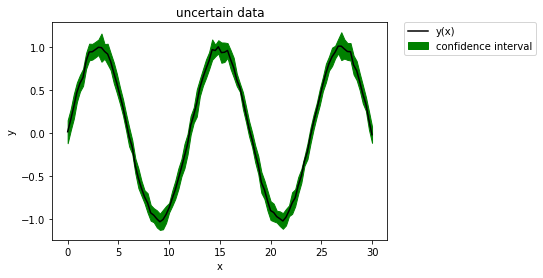

In [38]:
import matplotlib
import matplotlib.pylab as plt

def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

x, y, error = gen_uncertain_data()
plt.plot(x, y, color = 'black', label = 'y(x)')
plt.title("uncertain data")
plt.xlabel('x')
plt.ylabel('y')
plt.fill_between(x, y-error, y+error, color = 'green', label = 'confidence interval')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**2. (1 балл)** Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию *plt.subplots*. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры *figsize*, *sharey*, *sharex* функции *plt.subplots*. Также полезными могут оказаться параметры *bins*, *normed* функции *plt.hist*.

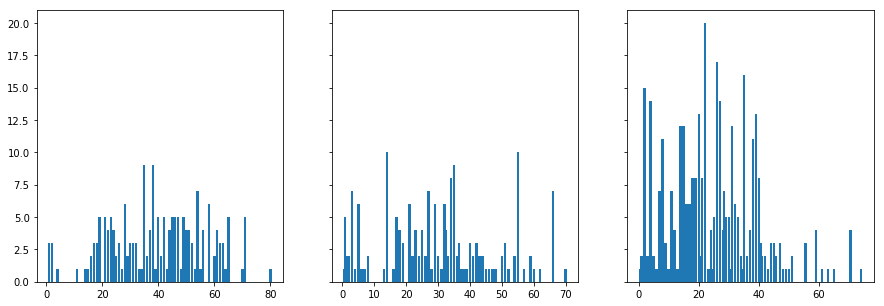

In [63]:
#all_dat
first_class_ages = all_dat['Age'][all_dat['Pclass'] == 1].unique()
ind_nan = np.where(pd.isnull(first_class_ages))
first_class_ages = np.delete(first_class_ages, ind_nan)
first_class_ages_counts = all_dat['Age'][all_dat['Pclass'] == 1].value_counts().values

second_class_ages = all_dat['Age'][all_dat['Pclass'] == 2].unique()
ind_nan = np.where(pd.isnull(second_class_ages))
second_class_ages = np.delete(second_class_ages, ind_nan)
second_class_ages_counts = all_dat['Age'][all_dat['Pclass'] == 2].value_counts().values

third_class_ages = all_dat['Age'][all_dat['Pclass'] == 3].unique()
ind_nan = np.where(pd.isnull(third_class_ages))
third_class_ages = np.delete(third_class_ages, ind_nan)
third_class_ages_counts = all_dat['Age'][all_dat['Pclass'] == 3].value_counts().values

fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(15, 5))
axes[0].bar(first_class_ages, first_class_ages_counts)
axes[1].bar(second_class_ages, second_class_ages_counts)
axes[2].bar(third_class_ages, third_class_ages_counts)
plt.show()